# **Loan Approval Classification | EDA & ML**

In [63]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import os
import joblib
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    RocCurveDisplay,
    roc_auc_score,
    roc_curve,
    classification_report
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform, uniform

import warnings
warnings.filterwarnings('ignore')

# For Local WANDB
os.environ["WANDB_AGENT_DISABLE_FLAPPING"] = "true"



import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv(f"C:/Users/LENOVO/Documents/Repository/Data And Ai/mlops-project-v2/mlops-project-v2/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [24]:
# convert to age to int format
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes

dtype('int64')

In [25]:
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']
num_cols = [var for var in df.columns if df[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [26]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [27]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

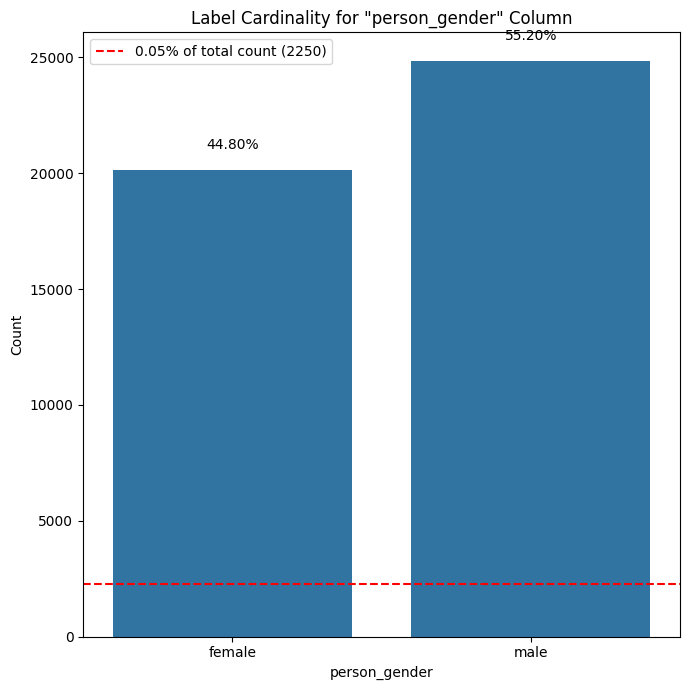

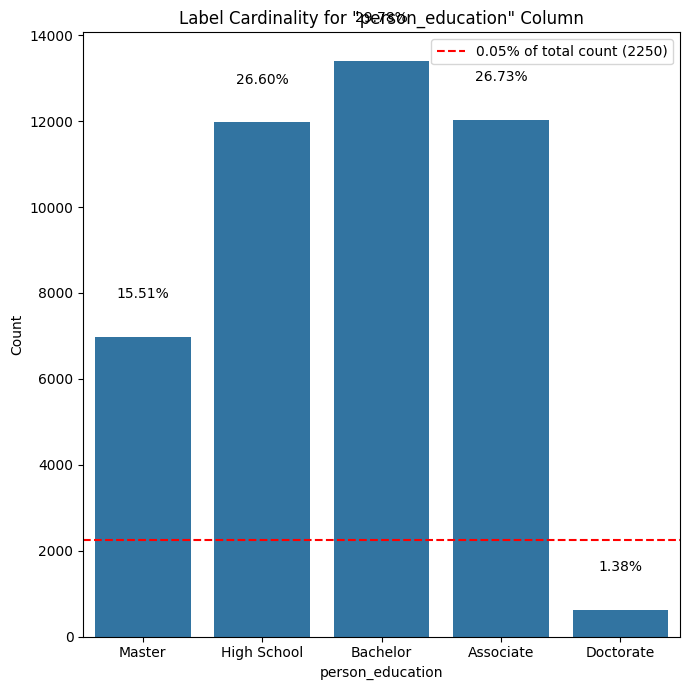

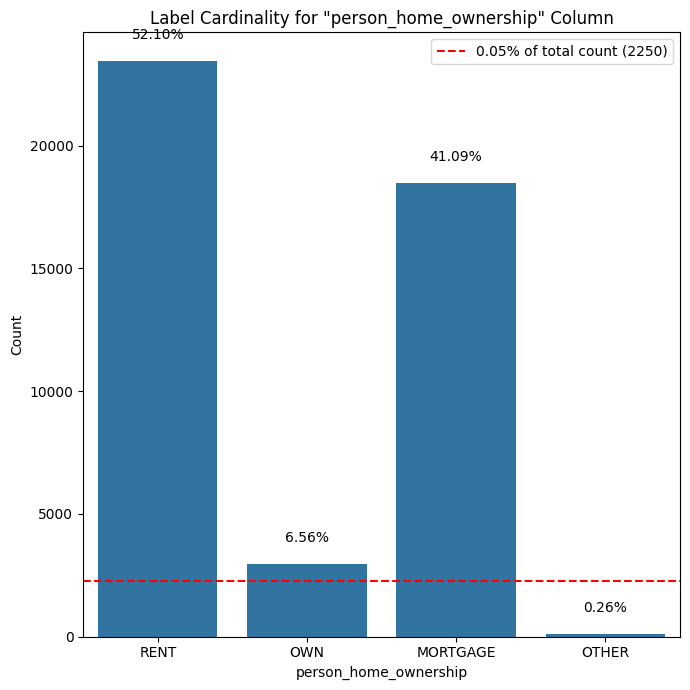

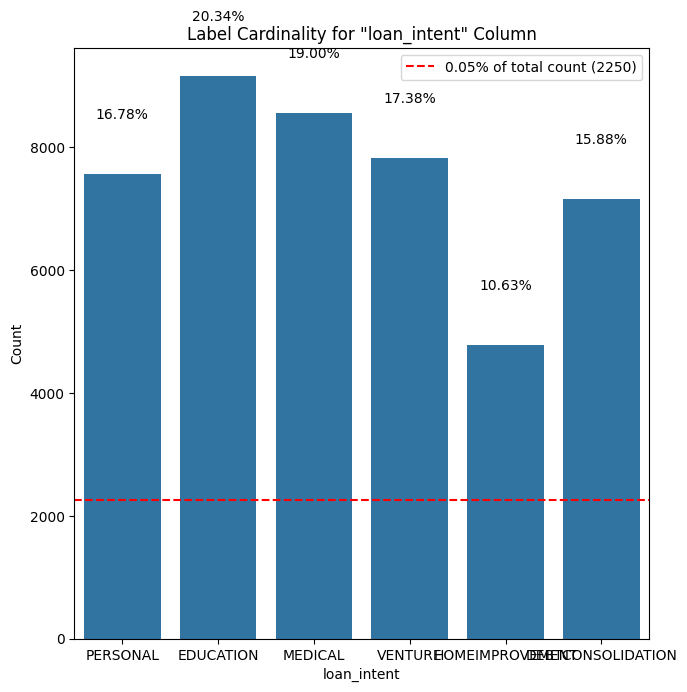

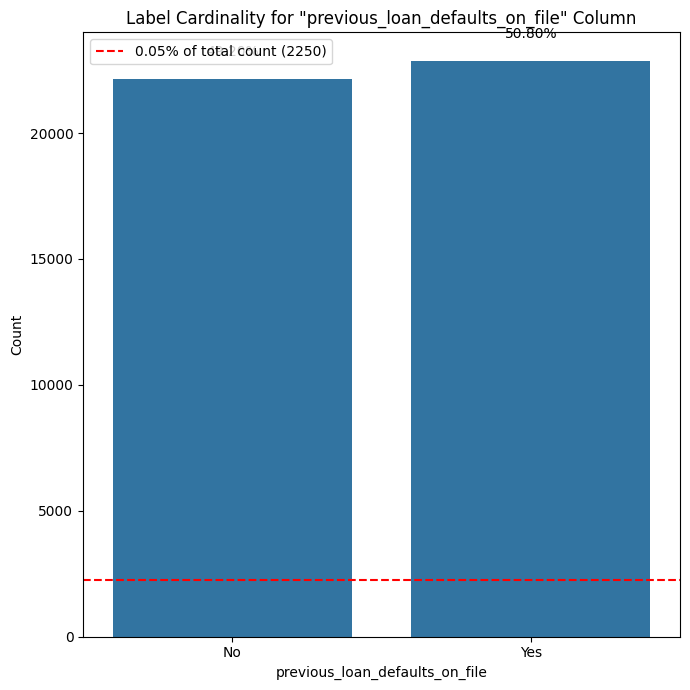

In [28]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")
    
    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(df, col)


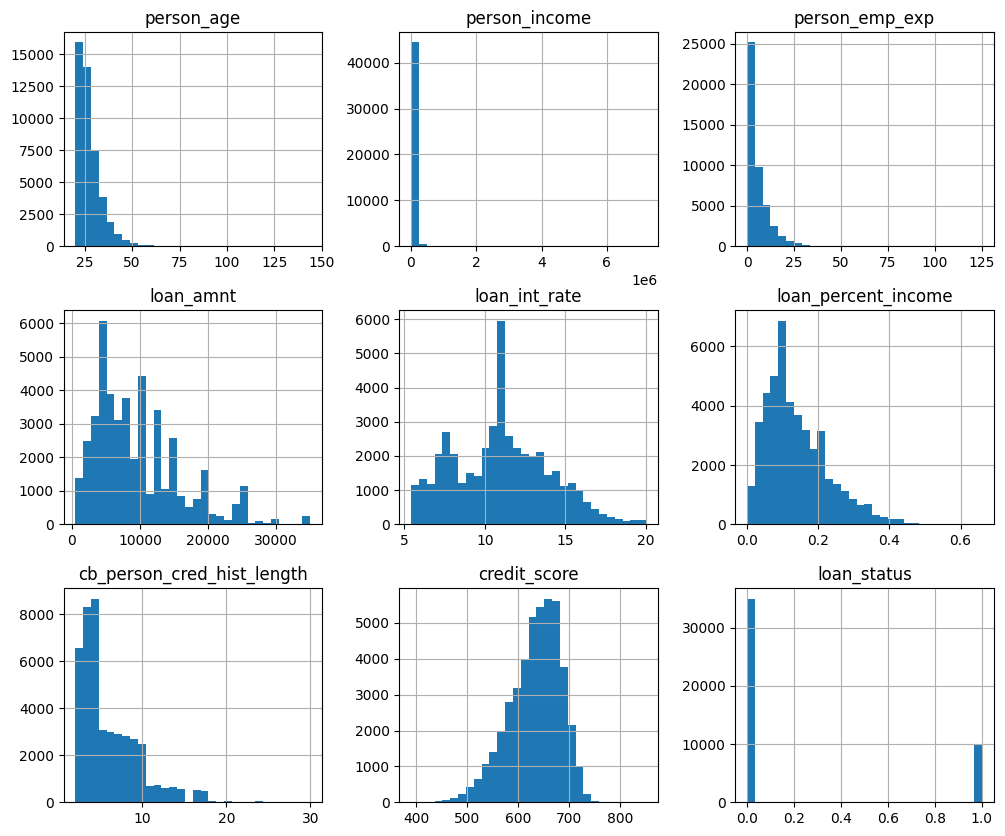

In [29]:
df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

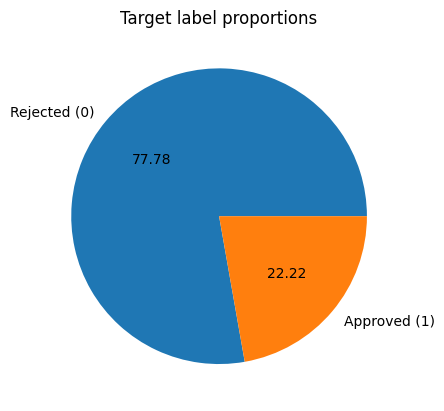

In [30]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

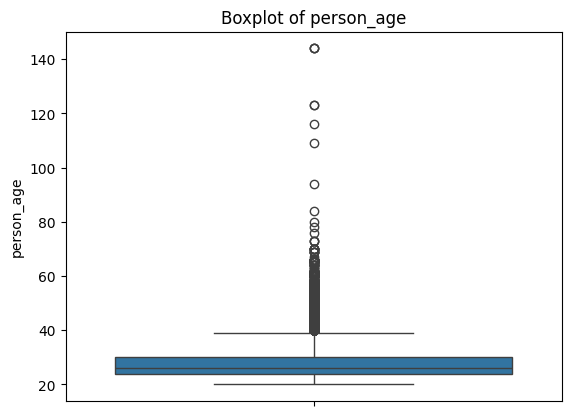

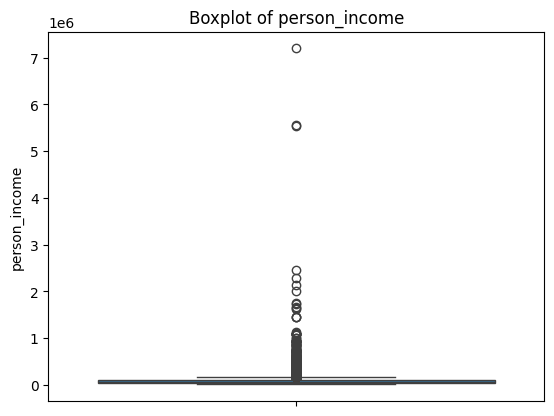

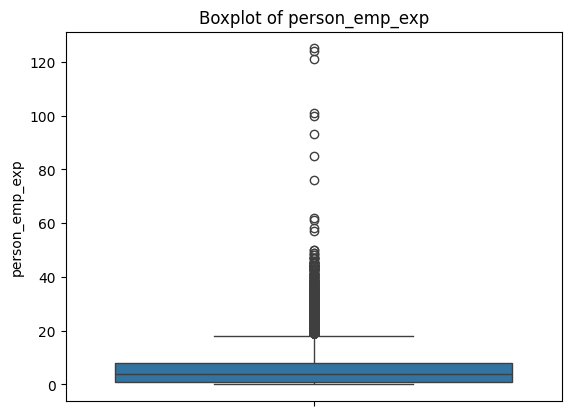

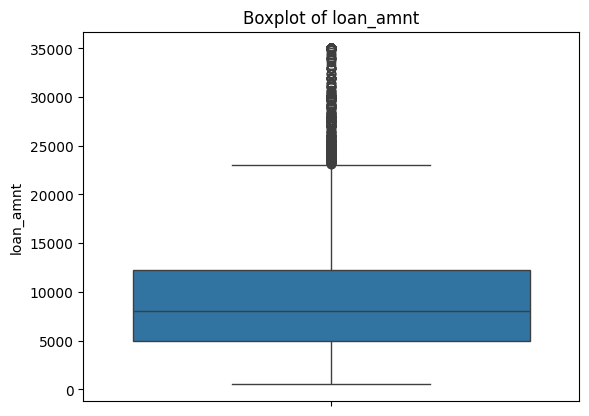

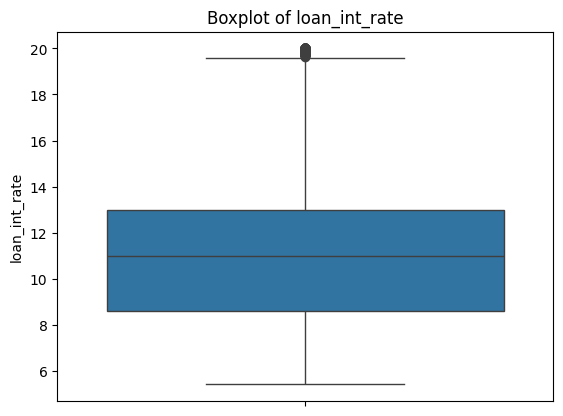

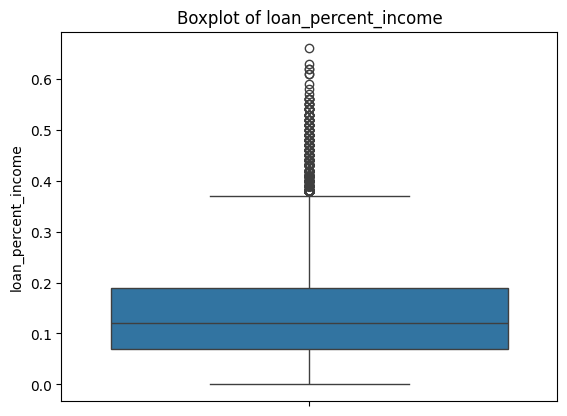

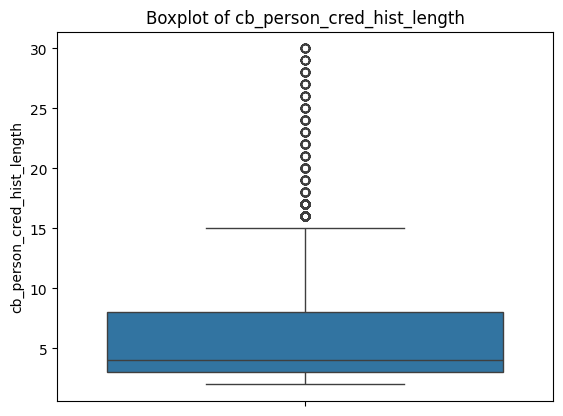

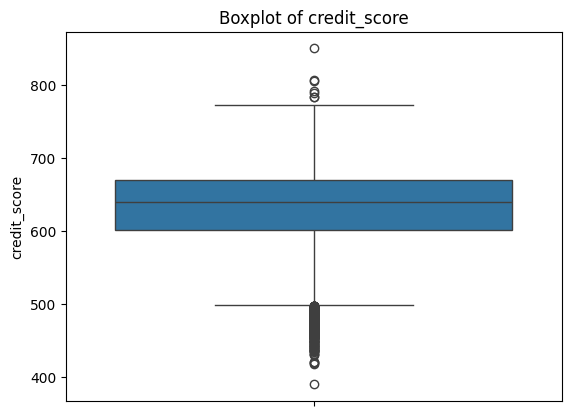

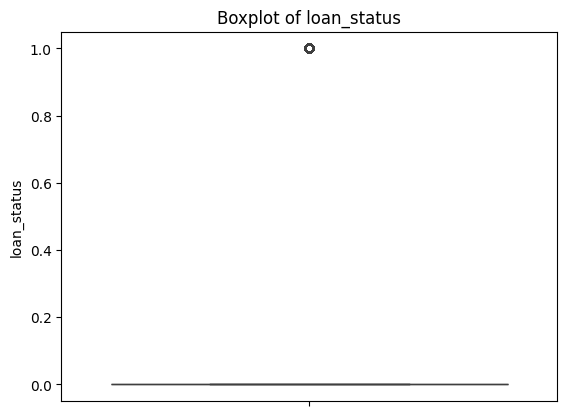

In [31]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [32]:
!pip install feature-engine



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
skewed_cols = ['person_age', 'person_income', 'person_emp_exp',
               'loan_amnt', 'loan_percent_income',
               'cb_person_cred_hist_length', 'credit_score']

norm_cols= ['loan_int_rate']

In [34]:
mms = MinMaxScaler()
ss = StandardScaler()

df[skewed_cols] = ss.fit_transform(df[skewed_cols])
df[skewed_cols] = ss.transform(df[skewed_cols])

df[norm_cols] = mms.fit_transform(df[norm_cols])
df[norm_cols] = mms.transform(df[norm_cols])

In [35]:
df['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':4
}, inplace=True)

df['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':4
}, inplace=True)



In [36]:
df["person_home_ownership"].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [37]:
df["loan_intent"].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [38]:
df["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [39]:
df["person_gender"].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [40]:
gender_mapping = {'male': 0, 'female': 1}
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}


df['person_gender'] = df['person_gender'].map(gender_mapping)
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)

In [41]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [42]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='iqr', tail='right',
                        variables= ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file'])

df2 = trimmer.fit_transform(df)

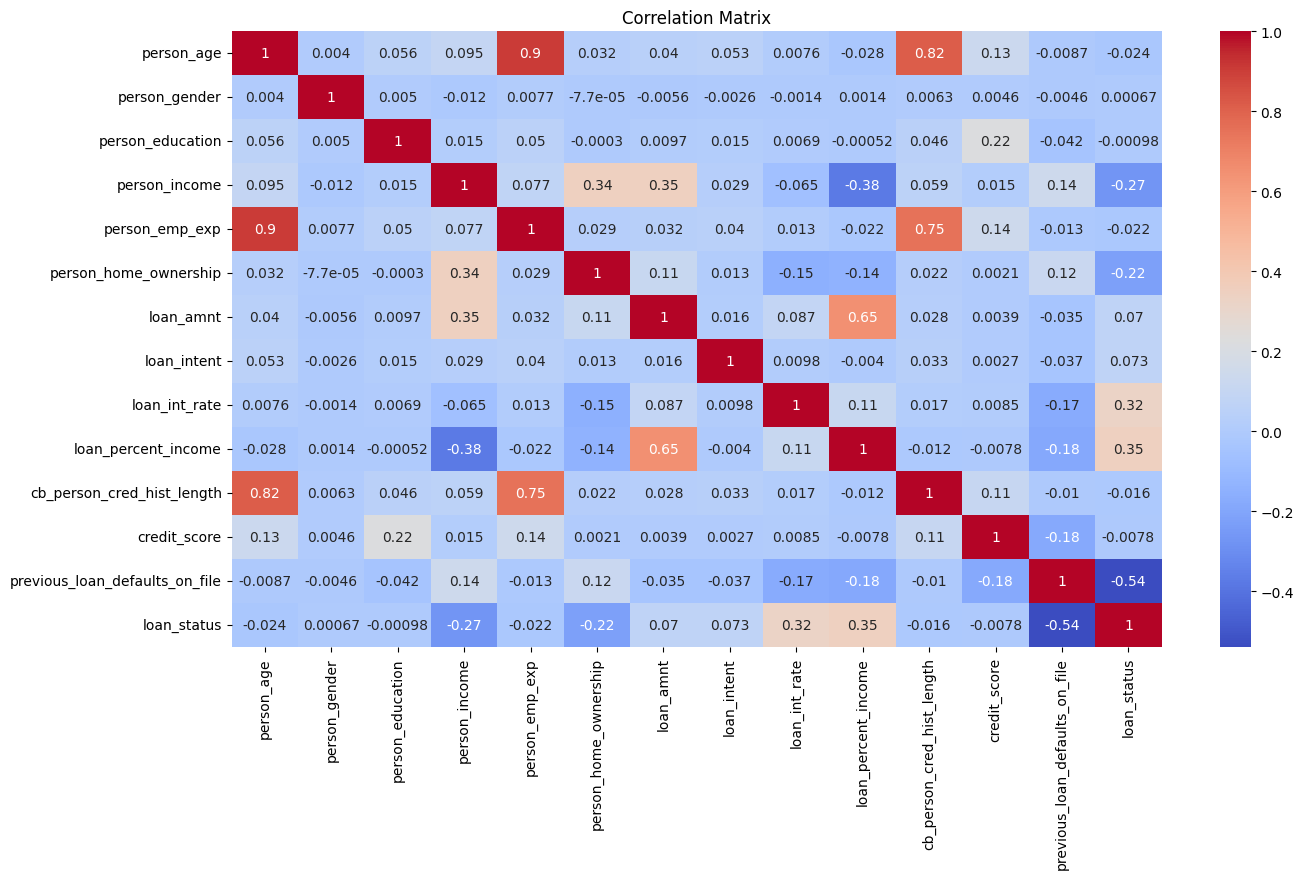

In [43]:
plt.figure(figsize=(15, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
threshold = 0.1

correlation_matrix = df2.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["loan_status"]) > threshold].tolist()
high_corr_features.remove("loan_status")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["loan_status"]

['person_income', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36000, 5), (36000,), (9000, 5), (9000,))

In [46]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [47]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [48]:
model.score(X_train, y_train)

0.8711111111111111

In [49]:
Y_pred = model.predict(X_test)

In [50]:
print(accuracy_score(y_test, Y_pred))

0.8658888888888889


In [51]:
model2 = SVC()
model2.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
Y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, Y_pred2))

0.852


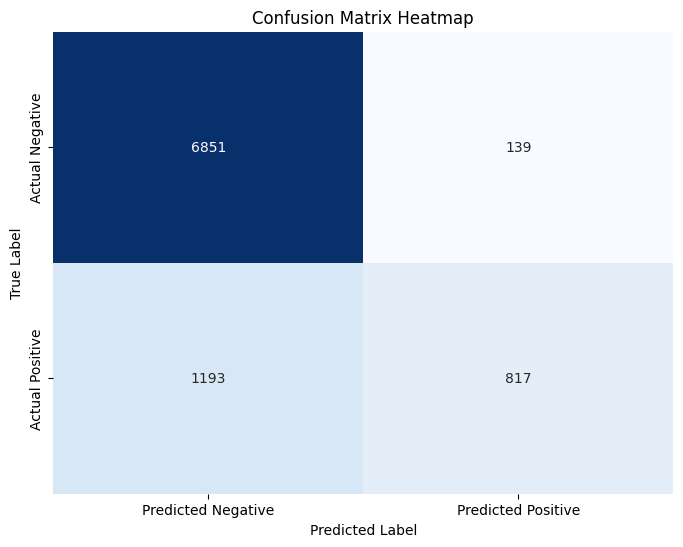

In [53]:
conf_matrix2 =confusion_matrix(y_test, Y_pred2)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [54]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.04%


In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6990
           1       0.75      0.70      0.72      2010

    accuracy                           0.88      9000
   macro avg       0.83      0.82      0.82      9000
weighted avg       0.88      0.88      0.88      9000



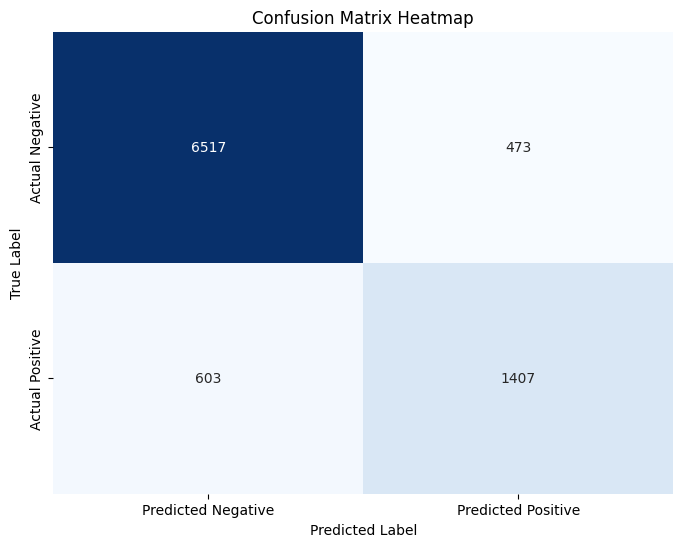

In [57]:
conf_matrix3 =confusion_matrix(y_test, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Initializing W & B

In [58]:
import wandb

Log dataset as W & B Artifact

In [59]:
import wandb

# Paste your API key here
wandb.login(key="c4c99f3f16b9118fc386b4e22e964f2acc74b736")

PROJECT = "mlops-project-v2"


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [60]:
import wandb


wandb.init(
    project="mlops-project-V2",    
    name="loan_data_artifact_creation",
    notes="Uploading loan dataset as artifact"
)

#Create the artifact and attach metadata

artifact = wandb.Artifact(
    name="loan_data_artifact_creation",
    type="dataset",
    description="Loan dataset for MLOPS project",
    metadata={
        "num_rows": len(df),
        "num_columns": len(df.columns),
        "columns": list(df.columns),
        "source": "Local upload - loan_data.csv",
        "version": "1.0",
        "created_by": "Ramsha Naseem",
        "notes": "Original dataset before feature engineering"
    }
)

#Add the file to the artifact
artifact.add_file("loan_data.csv")
run =wandb.init(project=PROJECT, job_type="data-versioning")


#Log the artifact to W&B
wandb.log_artifact(artifact)

# 6. Finish the run
wandb.finish()



Baseline Model


In [68]:
run = wandb.init(project=PROJECT, job_type="baseline")

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

metrics = {
    "baseline_accuracy": accuracy_score(y_test, y_pred),
    "baseline_roc_auc": roc_auc_score(y_test, y_prob),
    "baseline_precision": precision_score(y_test, y_pred),
    "baseline_recall": recall_score(y_test, y_pred)
}
wandb.log(metrics)

print("Baseline Performance")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Save and log as model artifact
os.makedirs("models", exist_ok=True)
joblib.dump(baseline_model, "models/logistic_regression_baseline.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(list(X_selected), "models/feature_names.pkl")

baseline_artifact = wandb.Artifact(
    name="logistic-regression-baseline",
    type="model",
    description="Baseline Logistic Regression for Loan Approval",
    metadata=metrics
)
baseline_artifact.add_dir("models")
wandb.log_artifact(baseline_artifact)

run.finish()

baseline_accuracy,▁
baseline_precision,▁
baseline_recall,▁
baseline_roc_auc,▁
baseline_accuracy,0.88722
baseline_precision,0.75426
baseline_recall,0.7305
baseline_roc_auc,0.94497


Baseline Performance
baseline_accuracy: 0.8872
baseline_roc_auc: 0.9450
baseline_precision: 0.7543
baseline_recall: 0.7305


wandb: Adding directory to artifact (models)... Done. 0.6s


baseline_accuracy,▁
baseline_precision,▁
baseline_recall,▁
baseline_roc_auc,▁
baseline_accuracy,0.88722
baseline_precision,0.75426
baseline_recall,0.7305
baseline_roc_auc,0.94497


### Define Sweep Configuration

In [70]:
sweep_config = {
    "method": "random",
    "metric": {"name": "val_roc_auc", "goal": "maximize"},
    "parameters": {
        "C": {"distribution": "log_uniform_values", "min": 1e-4, "max": 1e4},
        "penalty": {"values": [ "elasticnet"]}, # "l1", "l2"
        "solver": {"values": ["saga"]}, # "liblinear", "lbfgs"
        "max_iter": {"values": [100, 200, 500]},
        "l1_ratio": {"distribution": "uniform", "min": 0.0, "max": 1.0}
    }
}
sweep_id = wandb.sweep(sweep_config, project=PROJECT)
print(f"Created Sweep: {sweep_id}")


Create sweep with ID: 3fpdry1j
Sweep URL: https://wandb.ai/ramshanaseem1-atomcamp/mlops-project-V2/sweeps/3fpdry1j
Created Sweep: 3fpdry1j


### Sweep Training Function

In [77]:
# For Local Env: VSCode, etc
os.environ["WANDB_NOTEBOOK_NAME"] = "ignore"       # Disable IPython display mode
os.environ["WANDB_SILENT"] = "true"                # Suppress HTML output

def sweep_train():
    run = wandb.init(project=PROJECT)
    config = wandb.config

    # Split again (for standalone sweep runs)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42, stratify=Y)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression(
        C=config.C,
        penalty=config.penalty,
        solver=config.solver,
        max_iter=config.max_iter,
        l1_ratio=config.l1_ratio if "elasticnet" in config.penalty else None,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    wandb.log({
        "val_accuracy": accuracy_score(y_test, y_pred),
        "val_roc_auc": roc_auc_score(y_test, y_prob),
        "val_precision": precision_score(y_test, y_pred),
        "val_recall": recall_score(y_test, y_pred)
    })


### Run The Sweep

In [78]:
wandb.agent(sweep_id, function=sweep_train, count=5)